# Chapter 16 - Backtest Forecast Models

The goal of time series forecasting is to make accurate predictions about the future. The fast and powerful methods that we rely on in machine learning, such as using train-test splits and k-fold cross-validation, do not work in the case of time series data. This is because they ignore the temporal components inherent in the problem.

After completing this tutorial, you will know:
- The limitations of traditional methods of model evaluation from machine learning and why evaluating models on out-of-sample data is required.
- How to create train-test splits and multiple train-test splits of time series data for model evaluation in Python.
- How walk-forward validation provides the most realistic evaluation of machine learning models on time series data.

## 16.1 Model Evaluation

How do we know how good a given model is? We could evaluate it on the data used to train it. This would be invalid. It might provide insight into how the selected model works, and even how it may be improved. But, any estimate of performance on this data would be optimistic, and any decisions based on this performance would be biased.

In applied machine learning, we often split our data into a train and a test set: the training set used to prepare the model and the test set used to evaluate it. We may even use k-fold cross-validation that repeats this process by systematically splitting the data into k groups, each given a chance to be a held out model.

We will look at three different methods that you can use to backtest your machine learning models on time series problems. They are:
1. Train-Test split that respect temporal order of observations.
2. Multiple Train-Test splits that respect temporal order of observations.
3. Walk-Forward Validation where a model may be updated each time step new data is received.

## 16.2 Monthly Sunspots Dataset

This dataset describes a monthly count of the number of observed sunspots for just over 230 years (1749-1983).

## 16.3 Train-Test Split

You can split your dataset into training and testing subsets. Your model can be prepared on the training dataset and predictions can be made and evaluated for the test dataset. This can be done by selecting an arbitrary split point in the ordered list of observations and creating two new datasets.

In [24]:
# calculate a train-test split of a time series dataset
from pandas import read_csv
from pylab import rcParams

csvfile = '.\\code\\chapter_16\\sunspots.csv'

series = read_csv(csvfile, header=0, index_col=0, parse_dates=True, squeeze=True)

X = series.values
train_size = int(len(X) * 0.66)
train, test = X[0:train_size], X[train_size:len(X)]

print('Observations: %d' % (len(X)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

Observations: 2820
Training Observations: 1861
Testing Observations: 959


Observations: 2820
Training Observations: 1861
Testing Observations: 959


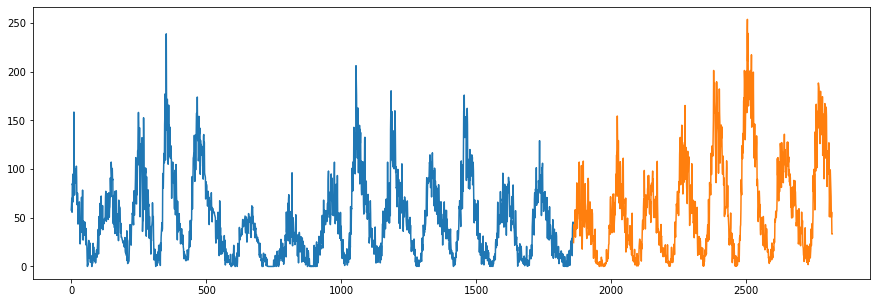

In [25]:
# plot train-test split of time series data
from pandas import read_csv
from matplotlib import pyplot

%matplotlib inline

csvfile = '.\\code\\chapter_16\\sunspots.csv'

series = read_csv(csvfile, header=0, index_col=0, parse_dates=True, squeeze=True)

X = series.values
train_size = int(len(X) * 0.66)
train, test = X[0:train_size], X[train_size:len(X)]
print('Observations: %d' % (len(X)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

rcParams['figure.figsize'] = 15, 5
pyplot.plot(train)
pyplot.plot([None for i in train] + [x for x in test])
pyplot.show()

Using a train-test split method to evaluate machine learning models is fast. Preparing the data is simple and intuitive and only one model is created and evaluated. It is useful when you have a large amount of data so that both training and tests sets are representative of the original problem.

## 16.4 Multiple Train-Test Splits

We can repeat the process of splitting the time series into train and test sets multiple times. This will require multiple models to be trained and evaluated, but this additional computational expense will provide a more robust estimate of the expected performance of the chosen method and conguration on unseen data.

The dataset has 2,820 observations. Let's create 3 splits for the dataset. Using the same arithmetic above, we would expect the following train and test splits to be created:
- Split 1: 705 train, 705 test
- Split 2: 1,410 train, 705 test
- Split 3: 2,115 train, 705 test

Training Observations: 705
Testing Observations: 705
Observations: 1410
-----
Training Observations: 1410
Testing Observations: 705
Observations: 2115
-----
Training Observations: 2115
Testing Observations: 705
Observations: 2820
-----


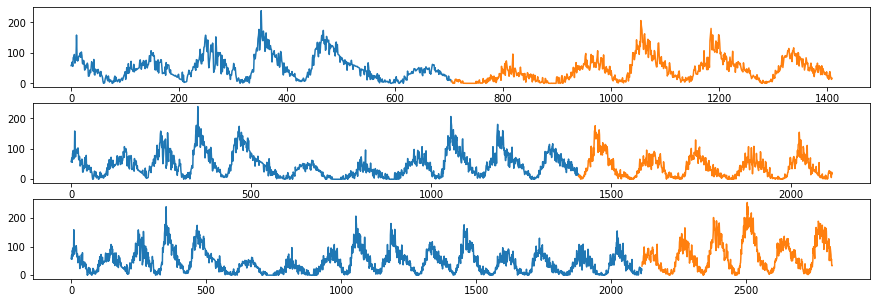

In [26]:
# calculate repeated train-test splits of time series data
from pandas import read_csv
from sklearn.model_selection import TimeSeriesSplit
from matplotlib import pyplot

csvfile = '.\\code\\chapter_16\\sunspots.csv'

series = read_csv(csvfile, header=0, index_col=0, parse_dates=True, squeeze=True)

X = series.values
splits = TimeSeriesSplit(n_splits=3)
pyplot.figure(1)
index = 1
for train_index, test_index in splits.split(X):
    train = X[train_index]
    test = X[test_index]    
    print('Training Observations: %d' % (len(train)))
    print('Testing Observations: %d' % (len(test)))
    print('Observations: %d' % (len(train) + len(test)))
    print('-----')

    pyplot.subplot(310 + index)
    pyplot.plot(train)
    pyplot.plot([None for i in train] + [x for x in test])
    
    index += 1

pyplot.show()

Using multiple train-test splits will result in more models being trained, and in turn, a more accurate estimate of the performance of the models on unseen data. **A limitation of the train-test split approach is that the trained models remain fixed as they are evaluated on each evaluation in the test set**. This may not be realistic as models can be retrained as new daily or monthly observations are made available. This concern is addressed in the next section.

## 16.5 Walk Forward Validation

In practice, we very likely will retrain our model as new data becomes available. This would give the model the best opportunity to make good forecasts at each time step. We can evaluate our machine learning models under this assumption.

Because this methodology involves moving along the time series one-time step at a time, it is often called Walk Forward Testing or Walk Forward Validation. Additionally, because a sliding or expanding window is used to train a model, this method is also referred to as Rolling Window Analysis or a Rolling Forecast.

In [27]:
# walk forward evaluation model for time series data
from pandas import read_csv

csvfile = '.\\code\\chapter_16\\sunspots.csv'

series = read_csv(csvfile, header=0, index_col=0, parse_dates=True, squeeze=True)

X = series.values
n_train = 500
n_records = len(X)
for i in range(n_train, n_records):
    train, test = X[0:i], X[i:i+1]
    print('train=%d, test=%.2f' % (len(train), test))
    #print('train=%d, test=%d' % (len(train), len(test)))

n=1954, test=4.20
train=1955, test=2.20
train=1956, test=0.30
train=1957, test=0.00
train=1958, test=4.90
train=1959, test=4.50
train=1960, test=4.40
train=1961, test=4.10
train=1962, test=3.00
train=1963, test=0.30
train=1964, test=9.50
train=1965, test=4.60
train=1966, test=1.10
train=1967, test=6.40
train=1968, test=2.30
train=1969, test=2.90
train=1970, test=0.50
train=1971, test=0.90
train=1972, test=0.00
train=1973, test=0.00
train=1974, test=1.70
train=1975, test=0.20
train=1976, test=1.20
train=1977, test=3.10
train=1978, test=0.70
train=1979, test=3.80
train=1980, test=2.80
train=1981, test=2.60
train=1982, test=3.10
train=1983, test=17.30
train=1984, test=5.20
train=1985, test=11.40
train=1986, test=5.40
train=1987, test=7.70
train=1988, test=12.70
train=1989, test=8.20
train=1990, test=16.40
train=1991, test=22.30
train=1992, test=23.00
train=1993, test=42.30
train=1994, test=38.80
train=1995, test=41.30
train=1996, test=33.00
train=1997, test=68.80
train=1998, test=71.60
tr